# ADVANCED PROGRAMMING

### Assignment: Loss functions for regression 
#### Francesco Ghezzo VR496402

Compare different loss functions for regression problems. Define a set of simple
regression problems, implement a set of baseline network architectures and
compare different loss functions under fair comparison conditions (initialization,
number of epochs, ...)

#### FUNZIONI DI LOSS:  

Mean Squared Error (MSE):
$MSE = \frac{1}{n} \sum_{i=1}^n (y_{pred}^{(i)} - y_{actual}^{(i)})^2$

Mean Absolute Error (MAE):
$MAE = \frac{1}{n} \sum_{i=1}^n \left| y_{pred}^{(i)} - y_{actual}^{(i)} \right|$

Huber loss:
$Huber-loss$ =$ \frac{1}{n} \sum_{i=1}^n \begin{cases}
\frac{1}{2}(y_{pred}^{(i)} - y_{actual}^{(i)})^2, & \text{if } \left|y_{pred}^{(i)} - y_{actual}^{(i)}\right| \leq \delta \newline \
\delta \left( \left|y_{pred}^{(i)} - y_{actual}^{(i)}\right| - \frac{1}{2}\delta \right), & \text{otherwise}
\end{cases}$

Log-cosh loss:
$Log-cosh-loss$ =$ \sum_{i=1}^n \log \left( \cosh \left( y_{pred}^{(i)} - y_{actual}^{(i)} \right) \right)$

First type of problem is to predict a summation of 5 random variable with a regression function.  
All the hyperparameters (e.g. layers, epochs, batch_size, ect...) are equal amoung this problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

def sum_regression(loss):

    # Generate some example data
    X = np.random.rand(1000, 5) # 1000 samples with 5 features
    y = np.sum(X, axis=1)      # target is the sum of the 5 features

    # Create the neural network model
    model = Sequential()
    model.add(Dense(10, input_dim=5, activation='relu'))
    model.add(Dense(10, input_dim=10, activation='relu'))

    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(loss=loss, optimizer='adam')

    # Train the model
    history = model.fit(X, y, epochs=50, batch_size=32, verbose=0)
    
    loss = model.evaluate(X, y)
    print('Test loss:', loss)
    
    # Plot the loss over epochs
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()


Here, we can see the results for the four type of losses, plotted amoung the epochs of problem 1.

32/32 [==============================] - 0s 3ms/step - loss: 2.1527e-04
Test loss: 0.0002152705128537491


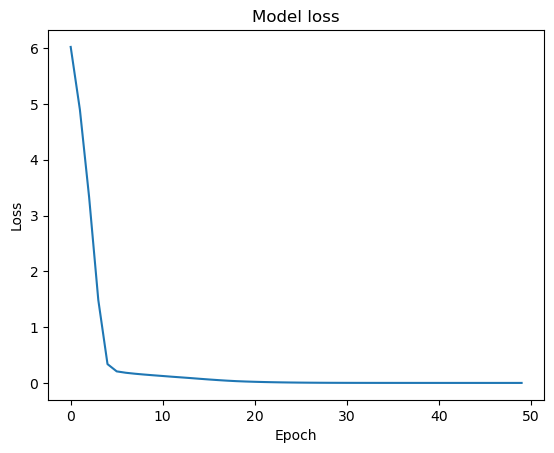

In [24]:
sum_regression('mse')

32/32 [==============================] - 0s 1ms/step - loss: 0.0016
Test loss: 0.0016220994293689728


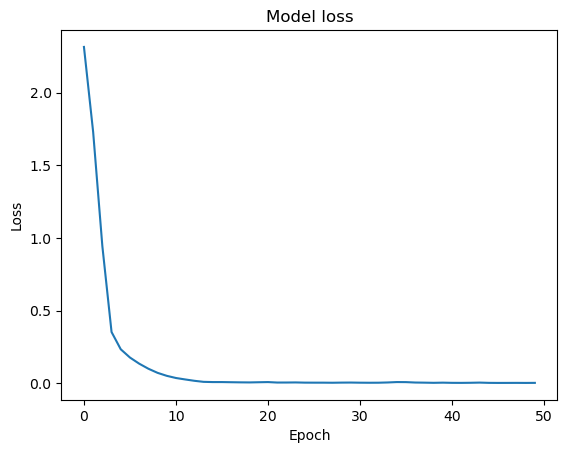

In [3]:
sum_regression('mae')

32/32 [==============================] - 0s 1ms/step - loss: 3.1305e-05
Test loss: 3.130539334961213e-05


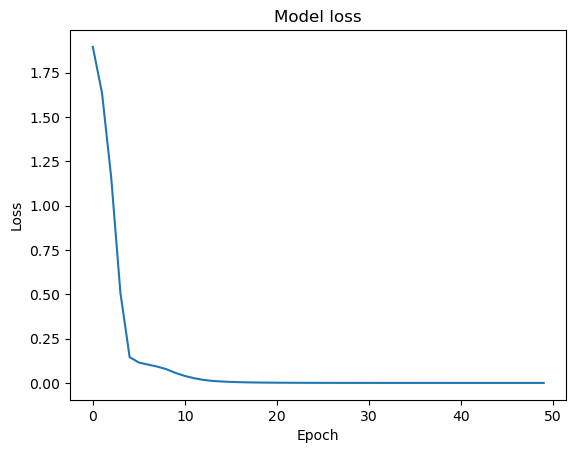

In [4]:
sum_regression('huber')

32/32 [==============================] - 0s 1ms/step - loss: 1.1087e-04
Test loss: 0.00011087035818491131


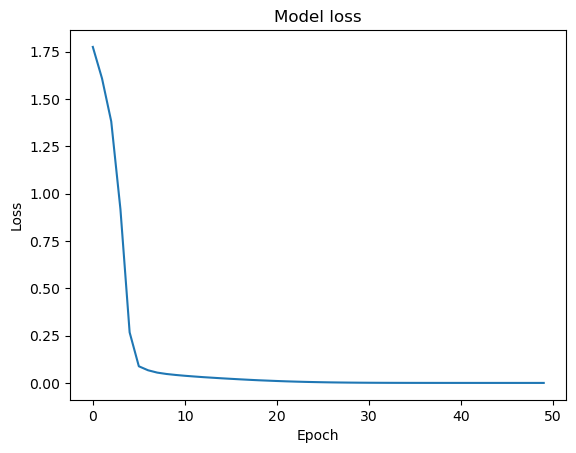

In [5]:
sum_regression('LogCosh')

This is the second problem.  
It's very similar to the first, but this time we have to predict not a simple summation but a combination of summation, multiplication and division.  
All the hyperparameters (e.g. layers, epochs, batch_size, ect...) are equal amoung this problem.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
def sum_regression2(loss):
    # Generate some example data
    X = np.random.rand(1000, 5) # 1000 samples with 5 features
    y = np.random.rand(1000)
    for i in range(len(X)):
        y[i] = (X[i,0] + X[i,1] + X[i,2]) / X[i,3]

    # Create the neural network model
    model = Sequential()
    model.add(Dense(10, input_dim=5, activation='relu'))
    model.add(Dense(10, input_dim=10, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(loss=loss, optimizer='adam')

    # Train the model
    history = model.fit(X, y, epochs=1000, batch_size=32, verbose=0)

    
    loss = model.evaluate(X, y)
    print('Test loss:', loss)
    
    
    # Plot the loss over epochs
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()


Here, we can see the results for the four type of losses, plotted amoung the epochs of problem 2.

32/32 [==============================] - 0s 1ms/step - loss: 894.4386
Test loss: 894.4385986328125


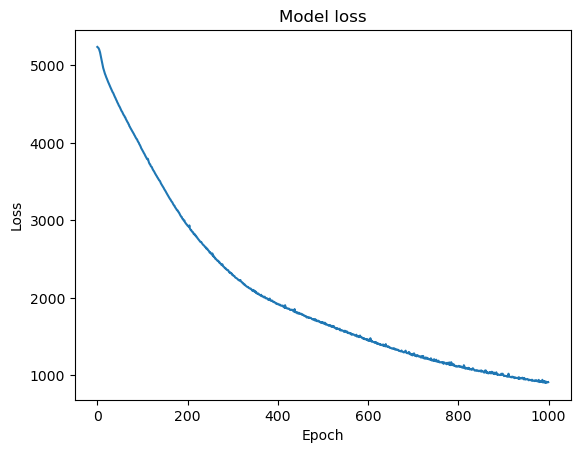

In [23]:
sum_regression2('mse')

32/32 [==============================] - 0s 1ms/step - loss: 4.3612
Test loss: 4.361210346221924


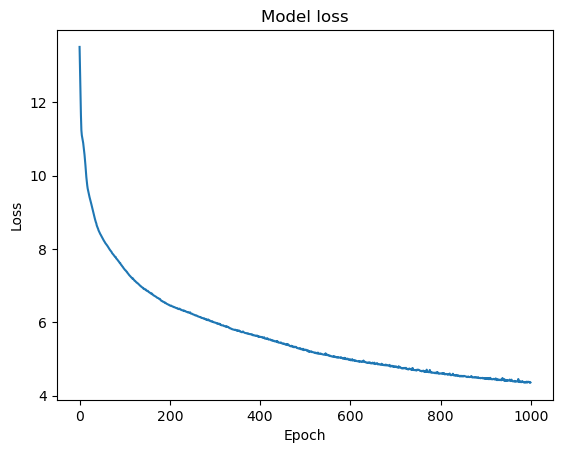

In [8]:
sum_regression2('mae')

32/32 [==============================] - 0s 2ms/step - loss: 7.5876
Test loss: 7.58758544921875


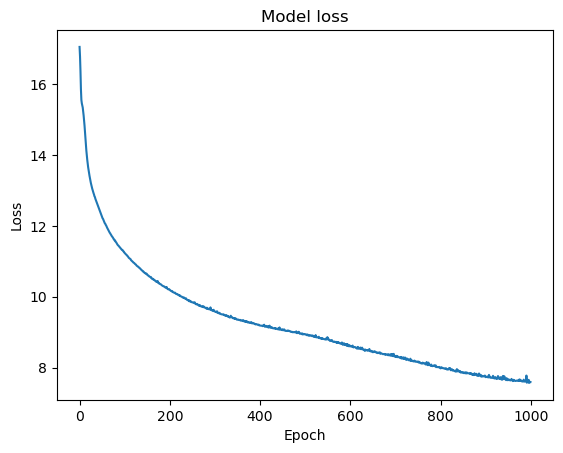

In [9]:
sum_regression2('huber')

32/32 [==============================] - 0s 1ms/step - loss: 1.7049
Test loss: 1.7049100399017334


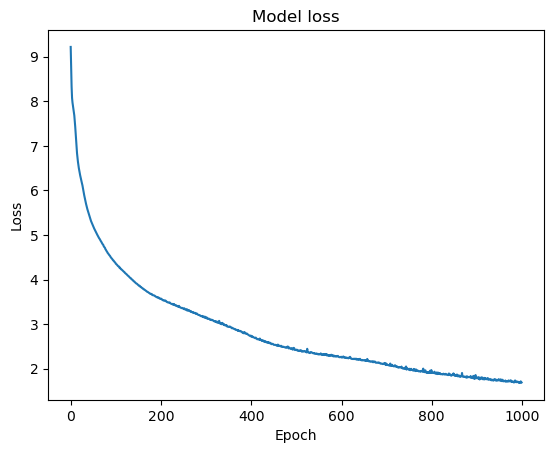

In [10]:
sum_regression2('LogCosh')

This is the third problem.  
It's from a KAGGLE repository, we need to estimate the variable "SalePrice" where we have as input all the other variable. 
All the hyperparameters (e.g. layers, epochs, batch_size, ect...) are equal amoung this problem.

In [11]:
import pandas  as pd
import numpy   as np
from   keras.models import Sequential
from   keras.layers import Dense             # i.e.fully connected

#===========================================================================
# read in the data from your local directory
#===========================================================================
train_data = pd.read_csv('train.csv')
test_data  = pd.read_csv('test.csv')

def kaggle_regression(loss):
    #===========================================================================
    # select some features of interest ("ay, there's the rub", Shakespeare)
    #===========================================================================
    features = ['OverallQual' , 'GrLivArea' , 'TotalBsmtSF' , 'BsmtFinSF1' ,
                '2ndFlrSF'    , 'GarageArea', '1stFlrSF'    , 'YearBuilt'  ]

    #===========================================================================
    #===========================================================================
    X_train       = train_data[features]
    y_train       = train_data["SalePrice"]
    final_X_test  = test_data[features]

    #===========================================================================
    # essential preprocessing: imputation; substitute any 'NaN' with mean value 
    #===========================================================================
    X_train      = X_train.fillna(X_train.mean())
    final_X_test = final_X_test.fillna(final_X_test.mean())


    #===========================================================================
    # parameters for keras
    #===========================================================================
    input_dim        = X_train.shape[1] # number of neurons in the input layer
    n_neurons        =  25       # number of neurons in the first hidden layer
    epochs           = 150       # number of training cycles

    #===========================================================================
    # keras model
    #===========================================================================
    model = Sequential()        # a model consisting of successive layers
    # input layer
    model.add(Dense(n_neurons, input_dim=input_dim, 
                    kernel_initializer='normal', 
                    activation='relu'))
    # output layer, with one neuron
    model.add(Dense(1, kernel_initializer='normal'))
    # compile the model
    model.compile(loss=loss, optimizer='adam')

    #===========================================================================
    # train the model
    #===========================================================================
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0)
    
    #===========================================================================
    # use the model to predict the prices for the test data
    #===========================================================================
    predictions = model.predict(final_X_test)
    
    loss = model.evaluate(final_X_test, predictions)
    print('Test loss:', loss)

    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()


Here, we can see the results for the four type of losses, plotted amoung the epochs of problem 3.

46/46 [==============================] - 0s 1ms/step - loss: 1.0331e-04
Test loss: 0.00010330796067137271


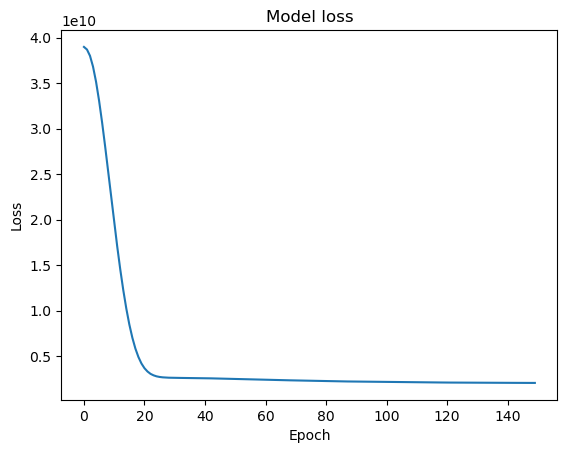

In [12]:
kaggle_regression('mse')

46/46 [==============================] - 0s 1ms/step - loss: 0.0052
Test loss: 0.005238230340182781


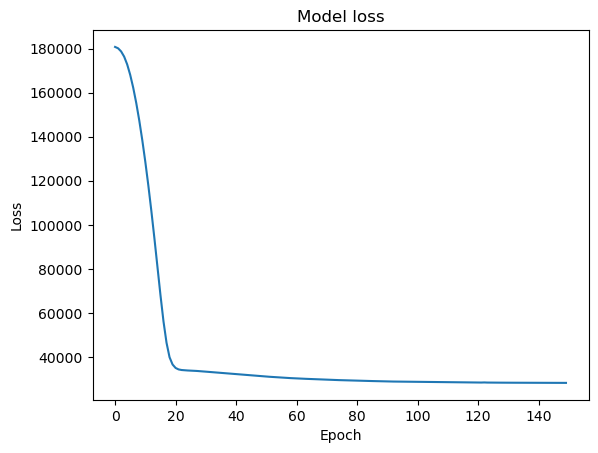

In [13]:
kaggle_regression('mae')

46/46 [==============================] - 0s 1ms/step - loss: 4.4500e-05
Test loss: 4.450044434634037e-05


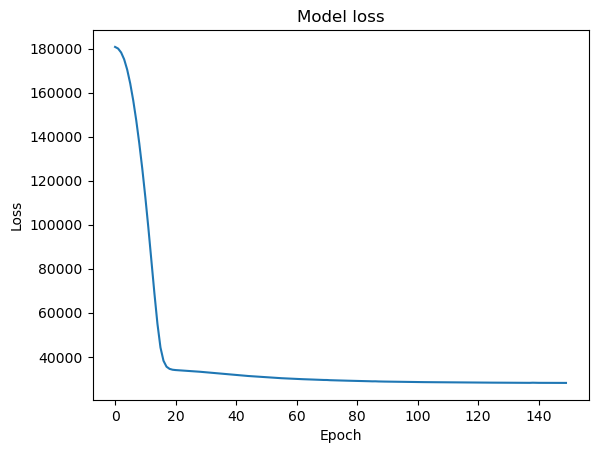

In [14]:
kaggle_regression('huber')

46/46 [==============================] - 0s 1ms/step - loss: 5.0311e-05
Test loss: 5.0311427912674844e-05


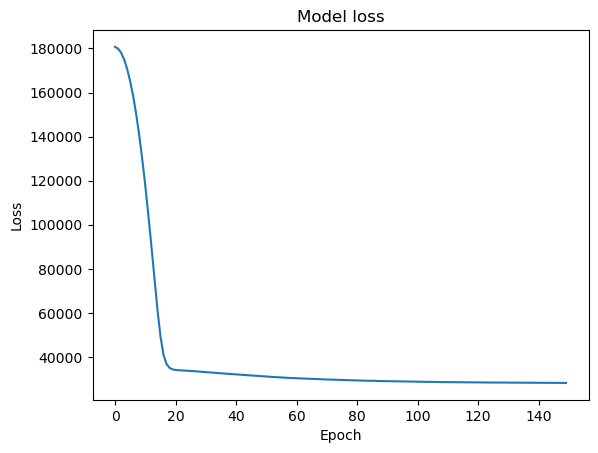

In [15]:
kaggle_regression('LogCosh')

This is the last problem.  It's similar to the third problem but with the famous boston dataset.
All the hyperparameters (e.g. layers, epochs, batch_size, ect...) are equal amoung this problem.

In [16]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

def boston_regression(loss):
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    y = raw_df.values[1::2, 2]


    # Normalize the input features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Define the neural network model
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))

    # Compile the model
    model.compile(loss=loss, optimizer='adam')

    # Train the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose = 0)

    # Evaluate the model on the testing set
    loss = model.evaluate(X_test, y_test)
    print('Test loss:', loss)




    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()


4/4 [==============================] - 0s 2ms/step - loss: 10.0096
Test loss: 10.009597778320312


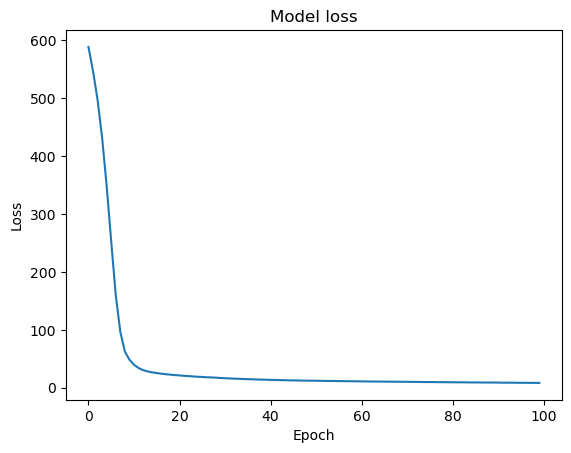

In [17]:
boston_regression('mse')

4/4 [==============================] - 0s 2ms/step - loss: 2.4304
Test loss: 2.4303650856018066


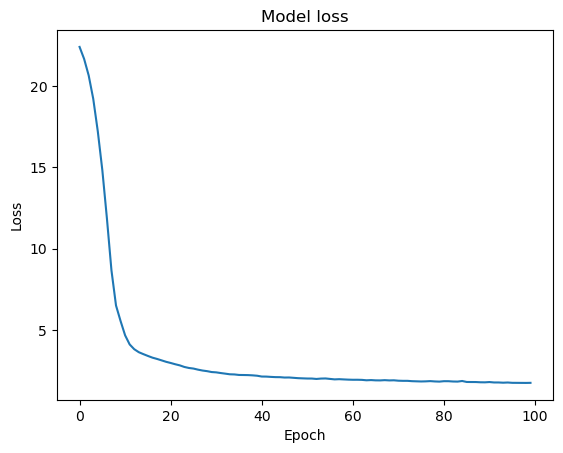

In [18]:
boston_regression('mae')

4/4 [==============================] - 0s 3ms/step - loss: 1.8225
Test loss: 1.8224709033966064


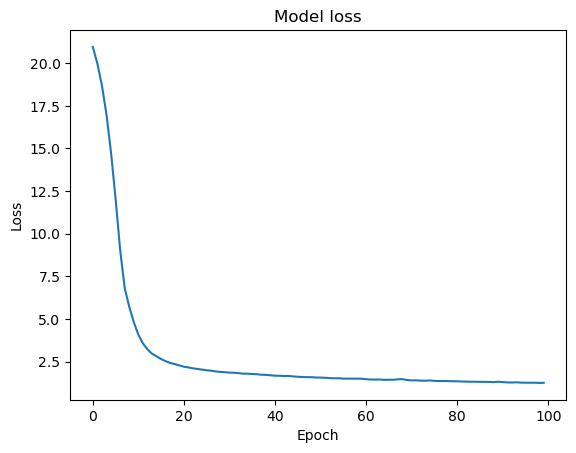

In [19]:
boston_regression('huber')

4/4 [==============================] - 0s 2ms/step - loss: 2.0593
Test loss: 2.0592598915100098


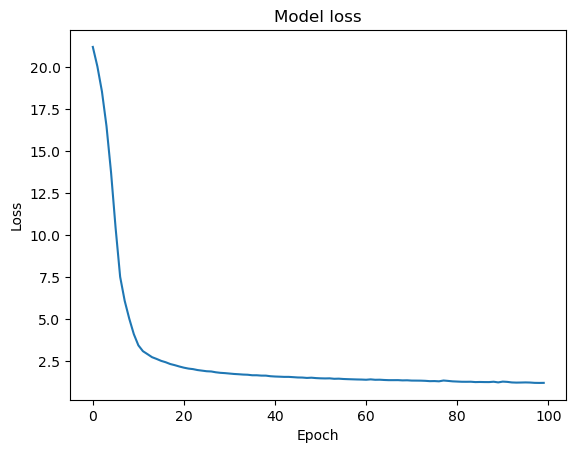

In [20]:
boston_regression('LogCosh')

### CONCLUSION  
As we can see, there is no loss function that is preferable a priori to the others.  
Each problem is unique and we should try the different losses for each one, to understand which one achieves the best result.   
The losses we seen so far, are the most used losses in the regression problem with the Artificial Neural Netowrk.   
The results of the last 2 problems are more truthful because of the complexity of the datasets and the facts we divided it in train and test.   Of course the evaluation we did are on the test set.
